<a href="https://colab.research.google.com/github/1rd0/18lab_bek/blob/master/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D0%9D%D0%A1_Keras_5_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание сверточных сетей в Keras

---

**ФИО:** Рабдел Дмитрий Александрович
**№ варианта** 2
---

Keras

Задание: создать модель для решения задачи классификации с использованием фреймворка Keras.

В этой работе булем решать задачу классификации изображений с использованием фреймворка Keras.
В ноутбуке ниже приведен пример создания нейронной сети  для классификации картинок автосредств. (Ссылка на датасет в примере https://drive.google.com/file/d/1AQFPYEuY_rVH2aUTPP3l6lX_JPaqfdnr/view?usp=sharing )

В задании для самостоятельной разработки необходимо загрузить датасет по номеру варианта
 ###  1 вариант

https://drive.google.com/file/d/1u0QzfWlF5h6xwiPAijxHSkIv8K-Jgdvv/view?usp=sharing

 ###  2 вариант

 https://drive.google.com/file/d/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e/view?usp=sharing   
 для классификации марок изображений (3 класса), провести аугментацию, построить и обучить 3 архитектуры нейронной сети, выбрать лучшую, вывести архитектуру и проверить работу сети на собственных картинках.

In [1]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import utils
from tensorflow import keras

import numpy as np

# Генератор аугментированных изображений
from keras.preprocessing.image import ImageDataGenerator

# Основные слои
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

# Оптимизатор
from keras.optimizers import Adam

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Подключение модуля для загрузки данных из облака
import gdown

# Инструменты для работы с файлами
import os

# Отрисовка графиков
import matplotlib.pyplot as plt


# Рисование графиков в ячейках Colab
%matplotlib inline

import zipfile


In [4]:
# Загрузка датасеа


gdown.download('https://drive.google.com/file/d/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e', None, quiet=False, fuzzy=True)


Downloading...
From: https://drive.google.com/file/d/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e
To: /content/1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e
83.3kB [00:00, 3.08MB/s]


'1C1GpGLSYSYRk7bJMPVhrQizEmyIvJ38e'

Загрузите архив с датасетом в среду выполнения и распакуйте архив

In [6]:
zip_path = '/content/data_1.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')

In [7]:
# Запишем путь к данным и создадим генераторы для обучающей и тестовой выборок

data_dir = '/content/Car'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)



# Аугментация
# Увеличение базы изображений
для обучения решается путем использования встроенного механизма Keras - ImageDataGenerator.
Создание объекта класса ImageDataGenerator с необходимыми параметрами.
Параметры можно посмотреть в документации
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator

Ниже приведены основные параметры, которые могут вам понадобиться:
	rotation_range=0* Значение (в градусах) для выбора случайного поворота изображения.
	width_shift_range=0.0  Задает сдвиг по ширине.
	height_shift_range=0.0  Задает сдвиг по высоте.
	brightness_range=None  Задает диапазон выбора сдвига по яркости
	shear_range=0.0 Задает диапазон сдвига пикселей изображения (угол сдвига в градусах в направлении против часовой стрелки)
	zoom_range=0.0 Диапазон случайного выбора масштабирования изображения
  channel_shift_range=0.0 Диапазон случайного сдвига каналов




In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Задаем параметры для увеличения данных
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Используем 20% данных для валидации
)

# Изображения для тестового набора только нормализуются
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

Существует метод генератора - .flow_from_directory(), который помогает извлечь из папок изображения для генерации, посчитать классы и автоматически вычислить метки классов для изображений.



In [10]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.
Found 3427 images belonging to 3 classes.


In [11]:
class_names = list(train_generator.class_indices.keys())
print("Имена классов:", class_names)

Имена классов: ['Ferrari', 'Mercedes', 'Renault']


# model 1

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Создаем модель
model = Sequential()
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Три нейрона для трех классов

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Параметры для увеличения данных
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Используем 20% данных для валидации
)

# Изображения для тестового набора только нормализуются
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Создаем генераторы данных для тренировки и валидации
train_generator = train_datagen.flow_from_directory(
    '/content/Car',  # Путь к тренировочным данным
    target_size=(150, 150),  # Размеры изображений
    batch_size=32,
    class_mode='categorical',  # Используем 'categorical' для многоклассовой классификации
    subset='training'  # Используем тренировочную часть данных
)

validation_generator = train_datagen.flow_from_directory(
    '/content/Car',  # Путь к тренировочным данным
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Используем 'categorical' для многоклассовой классификации
    subset='validation'  # Используем валидационную часть данных
)

# Создаем генератор данных для тестирования
test_generator = test_datagen.flow_from_directory(
    '/content/Car',  # Путь к тестовым данным
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # Используем 'categorical' для многоклассовой классификации
)

# Обучение модели
history = model.fit(train_generator, epochs=15, validation_data=validation_generator)

# Оценка модели
test_loss, test_acc = model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)


Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.
Found 3427 images belonging to 3 classes.
Epoch 1/15
86/86 [==============================] - 44s 410ms/step - loss: 149.7867 - accuracy: 0.4364 - val_loss: 1.0460 - val_accuracy: 0.4912
Epoch 2/15
86/86 [==============================] - 32s 370ms/step - loss: 0.9366 - accuracy: 0.5315 - val_loss: 1.0197 - val_accuracy: 0.4971
Epoch 3/15
86/86 [==============================] - 30s 352ms/step - loss: 0.9628 - accuracy: 0.5148 - val_loss: 0.9840 - val_accuracy: 0.4985
Epoch 4/15
86/86 [==============================] - 30s 352ms/step - loss: 0.9161 - accuracy: 0.5563 - val_loss: 1.0237 - val_accuracy: 0.4810
Epoch 5/15
86/86 [==============================] - 31s 361ms/step - loss: 0.9270 - accuracy: 0.5563 - val_loss: 0.9953 - val_accuracy: 0.4985
Epoch 6/15
86/86 [==============================] - 30s 351ms/step - loss: 0.8990 - accuracy: 0.5592 - val_loss: 0.9887 - val_accuracy: 0.5190
Epoch 7/15
86/8

# Вывод графика точности

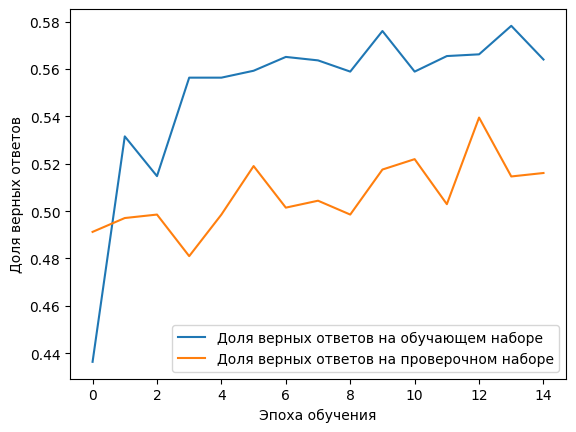

In [14]:
plt.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

# 2 model

> Усложним архитектуру сети и проведем обучение



In [ ]:
# Используем двумерные сверточные слои для обработки изображений
model2 = Sequential()
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(3, activation='softmax'))

# Компиляция модели
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

# Оценка модели
test_loss, test_acc = model.evaluate(test_generator)
print("Точность на тестовых данных:", test_acc)


Epoch 1/30


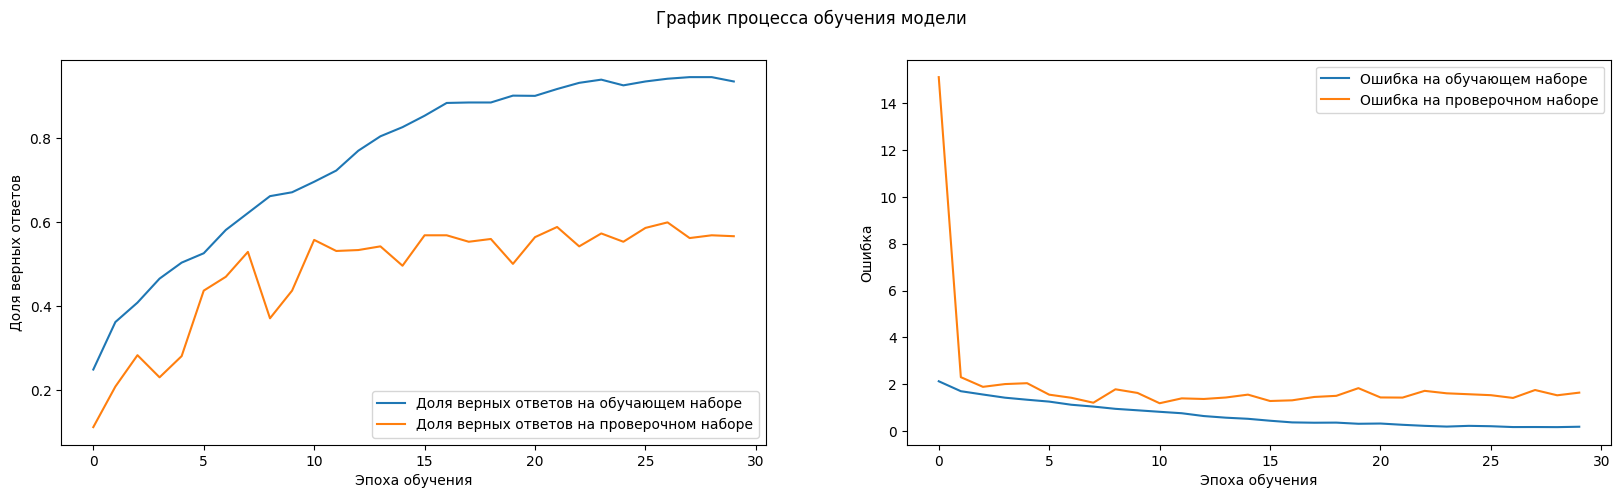

In [ ]:
# Вывод графиков точности и ошибки
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 5))
fig.suptitle('График процесса обучения модели')
ax1.plot(history.history['accuracy'],
           label='Доля верных ответов на обучающем наборе')
ax1.plot(history.history['val_accuracy'],
           label='Доля верных ответов на проверочном наборе')
ax1.xaxis.get_major_locator().set_params(integer=True)
ax1.set_xlabel('Эпоха обучения')
ax1.set_ylabel('Доля верных ответов')
ax1.legend()
ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
ax2.xaxis.get_major_locator().set_params(integer=True)
ax2.set_xlabel('Эпоха обучения')
ax2.set_ylabel('Ошибка')
ax2.legend()
plt.show()

Model 3


Ширина и высота (140, 140), количество каналов 3


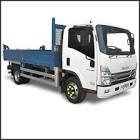

In [ ]:
from PIL import Image
img = Image.open('/content/truck.jpg')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

In [ ]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Открытие изображения
img = Image.open('/content/truck.jpg')
# Изменение размера изображения на 150x150 пикселей
img_resized = img.resize((150, 150))

# Преобразование изображения в массив numpy
img_array = image.img_to_array(img_resized)

# Нормализация значений пикселей
img_array /= 255.0

# Добавление измерения пакета (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Загрузка изображения в модель и получение предсказания
prediction = model.predict(img_array)

# Преобразование предсказания в читаемый формат
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]
print("Предсказанный класс:", predicted_class)

1/1 [==============================] - 0s 22ms/step
Предсказанный класс: truck


# Задание 1.
 Используя данные из варианта ( 3 класса), создайте 3 архитектуры сети, добейтесь точности распознавания не ниже 70% на обучающей выборке.

Для решения задачи вы можете использовать любой подход:

- модель без аугментации данных
- аугментация данных с помощью ImageDataGenerator



## Порядок выполнения

1. Загрузить датасет ____.zip для решения задачи классификации.
2. Провести предобработку данных с использованием  аугментации для обучающей и валидационной выборок.
3. Создать 3 архитектуры сети.
4. Обучите сеть и выведите графики точности и ошибок на тренировочной и валидационной выборках. Добейтесь точности 70% на обучающей выборке.
5. Оценить результаты точности лучшей модели на тестовой выборке.
6. Загрузите файлы с картинками из интернета или создайте свои фотографии.
Проверьте работу сети на собственных картинках.

*** ВОПРОСЫ ***

1. Для чего используется аугментация.
2. Какие параметры ImageDataGenerator вы использовали для создания обучающей выборки.
***Ваш ответ***

3. Выведите лучшую архитектуру нейронной сети и обьясните какие блоки вы использовали (слои).

***Ваш ответ***

In [ ]:
#
# Ваш код
#

4. По графикам потерь и метрике сделайте вывод была ли модель обучена, недообучена или переобучена.
***Ваш ответ***


Found 2743 images belonging to 3 classes.
Found 684 images belonging to 3 classes.
Found 3427 images belonging to 3 classes.
Training model 1...
Epoch 1/15
86/86 [==============================] - 30s 318ms/step - loss: 1.0330 - accuracy: 0.5206 - val_loss: 0.9470 - val_accuracy: 0.5629
Epoch 2/15
86/86 [==============================] - 25s 295ms/step - loss: 0.8883 - accuracy: 0.5797 - val_loss: 0.9722 - val_accuracy: 0.5263
Epoch 3/15
86/86 [==============================] - 29s 338ms/step - loss: 0.8648 - accuracy: 0.5990 - val_loss: 0.9331 - val_accuracy: 0.5395
Epoch 4/15
86/86 [==============================] - 37s 431ms/step - loss: 0.8498 - accuracy: 0.5961 - val_loss: 0.9398 - val_accuracy: 0.5556
Epoch 5/15
86/86 [==============================] - 27s 319ms/step - loss: 0.8346 - accuracy: 0.6110 - val_loss: 0.9325 - val_accuracy: 0.5482
Epoch 6/15
86/86 [==============================] - 28s 321ms/step - loss: 0.8121 - accuracy: 0.6212 - val_loss: 0.9238 - val_accuracy: 0.56

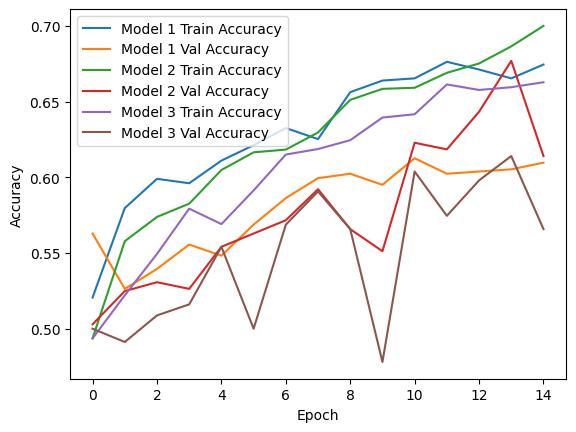

108/108 [==============================] - 6s 56ms/step - loss: 0.6798 - accuracy: 0.7155
Model 1 Test Accuracy: 0.7154945731163025
108/108 [==============================] - 5s 49ms/step - loss: 0.8860 - accuracy: 0.6163
Model 2 Test Accuracy: 0.6162824630737305
108/108 [==============================] - 6s 54ms/step - loss: 1.2168 - accuracy: 0.5477
Model 3 Test Accuracy: 0.5477093458175659


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import os


data_dir = '/content/Car'

# Создание генераторов данных
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    shear_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Функция для создания и обучения модели
def create_and_train_model(model, epochs=15):
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    history = model.fit(train_generator, epochs=epochs, validation_data=validation_generator)
    return history

# Архитектура 1
model1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Архитектура 2
model2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Архитектура 3
model3 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(3, activation='softmax')
])

# Обучение моделей и визуализация результатов
histories = []
for i, model in enumerate([model1, model2, model3], 1):
    print(f"Training model {i}...")
    history = create_and_train_model(model)
    histories.append(history)
    plt.plot(history.history['accuracy'], label=f'Model {i} Train Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'Model {i} Val Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Оценка моделей на тестовой выборке
for i, model in enumerate([model1, model2, model3], 1):
    test_loss, test_acc = model.evaluate(test_generator)
    print(f"Model {i} Test Accuracy: {test_acc}")



Ширина и высота (284, 177), количество каналов 3


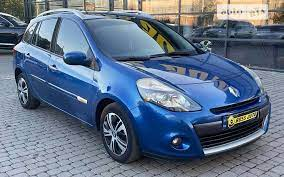

In [2]:
from PIL import Image
img = Image.open('/content/images (1).jpeg')
print(f"Ширина и высота {img.size}, количество каналов {len(img.mode)}")
img

In [8]:
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing import image

# Открытие изображения
img = Image.open('/content/images (2).jpeg')
# Изменение размера изображения на 150x150 пикселей
img_resized = img.resize((150, 150))

# Преобразование изображения в массив numpy
img_array = image.img_to_array(img_resized)

# Нормализация значений пикселей
img_array /= 255.0

# Добавление измерения пакета (batch dimension)
img_array = np.expand_dims(img_array, axis=0)

# Загрузка изображения в модель и получение предсказания
prediction = model2.predict(img_array)
class_names = list(train_generator.class_indices.keys())

# Преобразование предсказания в читаемый формат
predicted_class_index = np.argmax(prediction)
predicted_class = class_names[predicted_class_index]

print("Предсказанный класс:", predicted_class)

1/1 [==============================] - 0s 30ms/step
Предсказанный класс: Mercedes
